# [RQ5] The most influential users are the ones with the highest number of “followers", you can now look more into their activity.

First of all, we import packages: 

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm as tq
import collections
from statistics import mean

## -Plot the top 10 most popular users in terms of followers and their number of posts.

We import the data about profiles as a DataFrame using Pandas: 

In [16]:
data_profiles = pd.read_csv('/home/ec2-user/SageMaker/instagram_profiles.zip', usecols = ['profile_id', 'firstname_lastname', 'followers', 'n_posts'], delimiter='\t')

To see if it worked correctly we print the first 5 indexis: 

In [17]:
data_profiles.head()

,profile_id,firstname_lastname,followers,n_posts
0,4.721050e+09,John Pierce,146.0,170.0
1,5.905830e+08,Deanna,1145.0,2878.0
2,1.074147e+09,Eliza Gray,324.0,431.0
3,1.472039e+09,Thomas Clark,NaN,NaN
4,3.531421e+09,NaN,NaN,NaN


We can control the number of NaN comparing to the total number of profiles: 

In [18]:
number_of_NaN = data_profiles['followers'].isna().sum()

print(number_of_NaN)

data_profiles.shape

1056815


(4509586, 4)

The numbers of NaN is 1056815 on a total of 4509586 profiles.

We sort the column corresponding to followers and print the first 10 values: 

In [19]:
most_populars_users = (data_profiles.sort_values(by=["followers"], ascending=False, ignore_index=True)).head(10)

print(most_populars_users)

     profile_id      firstname_lastname    followers  n_posts
0  2.502532e+07               Instagram  285457645.0   5760.0
1  3.416684e+06       Victoria's Secret   65269440.0   7355.0
2  2.082449e+07                     NBA   35339708.0  28816.0
3  1.876191e+08  Louis Vuitton Official   30689316.0   3352.0
4  2.125507e+09                   Tasty   30246783.0   2791.0
5  4.968651e+08          Andres Iniesta   29542143.0    990.0
6  2.341008e+07                     H&M   29176804.0   4566.0
7  2.423993e+07                Syahrini   29042823.0   4719.0
8  5.041706e+07           Dan Bilzerian   26476004.0   1311.0
9  9.070254e+08            Akshay Kumar   26252169.0   1173.0


We plot the profile name with the corresponding number of follower to compare them: 

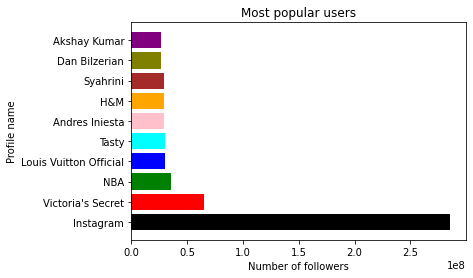

In [20]:
plt.barh(most_populars_users['firstname_lastname'], most_populars_users['followers'], color=['black', 'red', 'green', 'blue', 'cyan', 'pink', 'orange', 'brown', 'olive', 'purple'])

plt.title('Most popular users')

plt.ylabel('Profile name')

plt.xlabel('Number of followers')

plt.show()

Now we plot the 10 most following users in terms of their number of posts: 

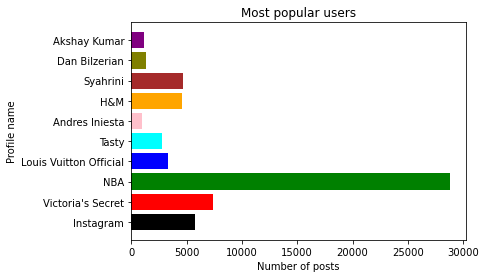

In [21]:
plt.barh(most_populars_users['firstname_lastname'], most_populars_users['n_posts'], color=['black', 'red', 'green', 'blue', 'cyan', 'pink', 'orange', 'brown', 'olive', 'purple'])

plt.title('Most popular users')

plt.ylabel('Profile name')

plt.xlabel('Number of posts')

plt.show()

## -Who is the most influential user?

The most influential users are the ones with the highest number of “followers" that is clearly Instagram with 285457645 followers. 

## -Have they posted anything with tagged locations? Extract the most frequent areas on their posts and plot the number of times each city has been visited.

First of all we extract Profile ID of the 10 most popular users in decrescent order and we create a list with their profile id:  

In [22]:
popular_users = data_profiles.sort_values(by=["followers"], ascending=False, ignore_index=True).head(10)

list_of_pid = [int(popular_users['profile_id'][i]) for i in popular_users.index]

We import the columns 'profile_id' and 'location_id' of the dataset of posts using pandas: 

In [23]:
data_posts = pd.read_csv('/home/ec2-user/SageMaker/instagram_posts.zip', delimiter='\t', usecols = ['profile_id','location_id'])

We drop NaN values of each columns that can not allow us to link 'profile_id' to 'location_id': 

In [24]:
data_posts1 = data_posts.dropna(subset = ['profile_id', 'location_id'])

We create a list of locations_id comparing the column of 'profile_id' to the profile id of the 10 most popular users: 

In [26]:
locations_id = []

for i in data_posts1.index: 
    
    if (data_posts1['profile_id'][i] in list_of_pid) == True:
        
        locations_id.append(int(data_posts1['location_id'][i]))       

To compare the list to the location_id in the dataset of location we need to tranform the element in integers.

We import the columns 'id' and 'city' from the data set of location as a dataframe using pandas:

In [28]:
data_locations = pd.read_csv('/home/ec2-user/SageMaker/instagram_locations.zip', usecols = ['id', 'city'], delimiter='\t')
print(data_locations.head())

                id                 city
0  110296492939207                  NaN
1        274391278          Nová Vieska
2  148885595789195     Kathmandu, Nepal
3        263258277        Paris, France
4  406147529857708  Burbank, California


We drop NaN values of each columns that can not allow us to link 'id' to 'name': 

In [29]:
data_locations1 = data_locations.dropna(subset = ['id', 'city'])

We create a list of the name of the locations that the 10 most popular users have visited:

In [31]:
locations_name = []

for i in data_locations1.index:
                  
    if (data_locations1['id'][i] in locations_id) == True:
                      
        locations_name.append(data_locations1['city'][i])
                      

We count the number of occurrencies through 'collection.counter()':

In [32]:
location_counter = collections.Counter(locations_name)

print(location_counter)

Counter({'New York, New York': 9, 'Singapore': 4, 'Los Angeles, California': 4, 'Houston, Texas': 3, 'London, United Kingdom': 3, 'Amsterdam, Netherlands': 3, 'Las Vegas, Nevada': 2, 'Shanghai, China': 2, 'Akron, Ohio': 1, 'Kowloon, Hong Kong': 1, 'Boulder City, Nevada': 1, 'Dallas, Texas': 1, 'Lontar, Jawa Timur, Indonesia': 1, 'Cusco, Peru': 1, 'Toronto, Ontario': 1, 'Adelaide, South Australia': 1, 'Stony Plain, Alberta': 1, 'Pune, Maharashtra': 1, 'Vaitape, French Polynesia': 1, 'Barcelona, Spain': 1, 'Sydney, Australia': 1, 'Bel Air, Los Angeles': 1, 'Tulum, Quintana Roo': 1, 'Kobe-shi, Hyogo, Japan': 1, 'Vail, Colorado': 1, 'Santa Monica, California': 1, 'Milwaukee, Wisconsin': 1, 'Eastwick, Pennsylvania': 1, 'Valencia': 1, 'Pierson, Michigan': 1, 'Novi Sad, Serbia': 1, 'Detroit, Michigan': 1, 'Jakarta, Indonesia': 1, 'Oakland, California': 1, 'Kosciuszko': 1, 'Hackney, Hackney, United Kingdom': 1, 'Bad Urach': 1, 'Hong Kong': 1, 'Pôrto São José, Parana, Brazil': 1, 'Memphis, Tenn

The most frequent visited area is New York with 9 occurrencies.

To plot them we decide to take the city that have been visited at least 2 times. So we create a new dictionary without the city that have been visited 1 time: 

In [33]:
new_dict = {x:location_counter[x] for x in location_counter if location_counter[x] != 1}

Now we can plot them: 

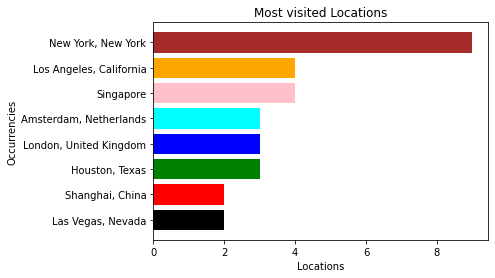

In [34]:
sort = dict(sorted(new_dict.items(), key=lambda item: item[1]))

lists = sort.items() 

x, y = zip(*lists)

plt.barh(x, y, color=['black', 'red', 'green', 'blue', 'cyan', 'pink', 'orange', 'brown', 'olive'])

plt.title('Most visited Locations')

plt.ylabel('Occurrencies')

plt.xlabel('Locations')

plt.show()

## -How many pictures-only posts have they published? How many reels? (only videos) and how many with both contents? Provide the number as percentages and interpret those figures.

We import columns 'profile_id' and 'post_type' of the dataset of post using pandas: 

In [36]:
data_posts = pd.read_csv('/home/ec2-user/SageMaker/instagram_posts.zip', delimiter='\t', usecols = ['profile_id', 'post_type'])

We drop NaN values that don't allow us to link profile id to post type:

In [37]:
data_posts2 = data_posts.dropna(subset = ['profile_id', 'post_type'])

We create a list with the post_type that the most 10 influential user have published: 

In [38]:
post_type = []

for i in data_posts2.index: 
    
    if (data_posts2['profile_id'][i] in list_of_pid) == True:
        
        post_type.append(data_posts2['post_type'][i])

We count the number of occurrencies through 'collection.counter()':

In [39]:
post_counter = collections.Counter(post_type)

In [40]:
print('The number of pictures: '+ str(post_counter[1]))
print('The number of reels: '+ str(post_counter[2]))
print('The number of multi-content: 0')
print(len(post_type))

The number of pictures: 128
The number of reels: 13
The number of multi-content: 0
141


In [41]:
print('The percentage of pictures: '+ str(round(post_counter[1]/len(post_type)*100, 2)) +'%')
print('The percentage of reels: '+ str(round(post_counter[2]/len(post_type)*100, 2)) +'%')
print('the percentage of multi-contents: 0 %')

The percentage of pictures: 90.78%
The percentage of reels: 9.22%
the percentage of multi-contents: 0 %


The majority of the posts published by the 10 most influential users are pictures. This could mean that this type of post is more successful on the public and for this reason they prefer to publish pictures instead of reels. From the analyses emerges that none of them published multi-contents post. This could mean that mixing contents doesn't receive much appreciament from the public or simply they prefer to mantain distance between picture and video contents. 

## -How many "likes" and comments did posts with only pictures receive? How about videos and mixed posts? Try to provide the average numbers and confront them with their followers amount, explaining what you can say from that comparison.

We import columns 'profile_id', 'post_type', 'numbr_likes' and 'number_comments of the dataset of post using pandas: 

In [43]:
data_posts3 = pd.read_csv('/home/ec2-user/SageMaker/instagram_posts.zip', usecols = ['profile_id','post_type', 'numbr_likes', 'number_comments'], sep='\t')            
            

We drop NaN of profile id that cannot allow us to see to which profile the posts belongs to and of post_type cause that cannot allow us to see if it is a picture or a video (from the previous analyses we know that there aren't mixed content):

In [44]:
data_posts_3 = data_posts3.dropna(subset = ['profile_id', 'post_type'])

Now we create 4 lists with the number of like and comments for picture and reel:  

In [45]:
picture_like = []
picture_comment = []
reel_like = []
reel_comment = []

for i in data_posts_3.index: 
    
    if (data_posts_3['profile_id'][i] in list_of_pid) == True:
        
        if data_posts_3['post_type'][i] == 1:
        
            picture_like.append(data_posts_3['numbr_likes'][i])
            
            picture_comment.append(data_posts_3['number_comments'][i])
            
        elif data_posts_3['post_type'][i] == 2:
            
            reel_like.append(data_posts_3['numbr_likes'][i])
            
            reel_comment.append(data_posts_3['number_comments'][i])
            

We control if there are NaN values: 

In [46]:
pic_lik = np.array(picture_like)

pic_com = np.array(picture_comment)

rel_lik = np.array(reel_like)

rel_com = np.array(reel_comment)

print(np.isnan(picture_like))

print(np.isnan(picture_comment))

print(np.isnan(reel_like))

print(np.isnan(reel_comment))

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 

The total number of likes for each categories: 

In [47]:
print('The posts with only pictures received a total of ' + str(int(pic_lik.sum())) + ' likes and ' + str(int(pic_com.sum())) +' comments')

print('The posts with only reels received a total of ' + str(int(rel_lik.sum())) + ' likes and ' + str(int(rel_com.sum())) +' comments')

The posts with only pictures received a total of 69285634 likes and 497013 comments
The posts with only reels received a total of 3464814 likes and 26258 comments


The average numbers: 

In [48]:
average_piclike = int(pic_lik.mean())

average_piccomment = int(pic_com.mean())

average_reellike = int(rel_lik.mean())

average_reelcomment = int(rel_com.mean())

print('The average number of likes for picture is : ' + str(average_piclike))

print('The average number of comment for picture is : ' + str(average_piccomment))

print('The average number of likes for reel is : ' + str(average_reellike))

print('The average number of comment for reel is : ' + str(average_reelcomment))

The average number of likes for picture is : 541294
The average number of comment for picture is : 3882
The average number of likes for reel is : 266524
The average number of comment for reel is : 2019


To compare them to the number of follower we can extract the mean of the follower of the 10 most influential users: 

In [49]:
number_follower = []

for i in range(10): 
    
    number_follower.append(most_populars_users['followers'][i])
    
mean_of_follower = int((np.array(number_follower)).mean())

print('The mean of the follower of the first 10 most influential users is: ' + str(mean_of_follower))

The mean of the follower of the first 10 most influential users is: 58749283


Now we can compare number of likes/comments to number of follower through percentages to see how the public react to the type of post: 

In [50]:
print('The percentage of follower that like picture type posts : '+ str(round(average_piclike/mean_of_follower*100, 2)) +'%')

print('The percentage of follower that comment picture type posts : '+ str(round(average_piccomment/mean_of_follower*100, 2)) +'%')

print('The percentage of follower that like video type posts : '+ str(round(average_reellike/mean_of_follower*100, 2)) +'%')

print('The percentage of follower that comment video type posts : '+ str(round(average_reelcomment/mean_of_follower*100, 2)) +'%')

The percentage of follower that like picture type posts : 0.92%
The percentage of follower that comment picture type posts : 0.01%
The percentage of follower that like video type posts : 0.45%
The percentage of follower that comment video type posts : 0.0%


We can't say too much from this percentage maybe cause of the big difference between numbers of follower in the top 10 of the most influential users or maybe cause there are missing values in the field "number of likes" or "number of comments" for users that have more weight in terms of followers (and probably consequently in term of likes and number of comments). 

It's better to create this list for every users in the top ten. To make an example on how to do it we can define a function that have as input the indexes of the first most 10 influential users:

In [58]:
def find_like(index): 
    
    picture_like0 = []
    picture_comment0 = []
    reel_like0 = []
    reel_comment0 = []

    for i in data_posts_3.index: 
    
        if data_posts_3['profile_id'][i] == list_of_pid[index]:
        
            if data_posts_3['post_type'][i] == 1:
        
                picture_like0.append(data_posts_3['numbr_likes'][i])
            
                picture_comment0.append(data_posts_3['number_comments'][i])
            
            elif data_posts_3['post_type'][i] == 2:
            
                reel_like0.append(data_posts_3['numbr_likes'][i])
            
                reel_comment0.append(data_posts_3['number_comments'][i])
    
    print('The number of data of picture_like are ' + str(len(picture_like0)))
    print('The number of data of picture_comment are ' + str(len(picture_comment0)))
    print('The number of data of reel_like are ' + str(len(reel_like0)))
    print('The number of data of reel_comment are ' + str(len(reel_comment0)))
    
    number_of_follower = int(most_populars_users['followers'][index])
    
    average_piclike = int(mean(picture_like0))

    average_piccomment = int(mean(picture_comment0))

    average_reellike = int(mean(reel_like0))

    average_reelcomment = int(mean(reel_comment0))
    
    print('The average number of likes for picture is : ' + str(average_piclike))

    print('The average number of comment for picture is : ' + str(average_piccomment))

    print('The average number of likes for reel is : ' + str(average_reellike))

    print('The average number of comment for reel is : ' + str(average_reelcomment))
    
    print('The number of follower is : ' + str(number_of_follower))
    
    print('The percentage of follower that like picture type posts : '+ str(round(average_piclike/number_of_follower*100, 2)) +'%')

    print('The percentage of follower that comment picture type posts : '+ str(round(average_piccomment/number_of_follower*100, 2)) +'%')

    print('The percentage of follower that like video type posts : '+ str(round(average_reellike/number_of_follower*100, 2)) +'%')

    print('The percentage of follower that comment video type posts : '+ str(round(average_reelcomment/number_of_follower*100, 2)) +'%')

    

For NBA profile we obtain:

In [ ]:
find_like(2)